#### Importing Libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


#### Load Datasets

In [2]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head(2)


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected


In [3]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


#### Remove leading/trailing spaces from column names

In [4]:
df.columns=df.columns.str.strip()



#### Check for missing values


In [5]:
df.isnull().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

#### Fill or drop missing values 

In [6]:
# df['loan_amount'].fillna(df['loan_amount'].median(), inplace=True) 

#### Feature Engineering

In [7]:

# Monthly income
df['monthly_income'] = df['income_annum'] / 12

# Total assets
df['total_assets'] = df['residential_assets_value'] + df['commercial_assets_value'] + df['luxury_assets_value'] + df['bank_asset_value']

# EMI (monthly payment)
df['EMI'] = df['loan_amount'] *12 / df['loan_term']

# Balance income (how much income left after EMI)
df['balance_income'] = df['monthly_income'] - df['EMI']

In [8]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_income,total_assets,EMI,balance_income
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,800000.000000,50700000,29900000.0,-2.910000e+07
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,341666.666667,17000000,18300000.0,-1.795833e+07
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,758333.333333,57700000,17820000.0,-1.706167e+07
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,683333.333333,52700000,46050000.0,-4.536667e+07
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,816666.666667,55000000,14520000.0,-1.370333e+07


#### Encode categorical variables

In [9]:
df['education']=df['education'].map({' Graduate':1,' Not Graduate':0})
df['self_employed']=df['self_employed'].map({' Yes':1,' No':0})
df['loan_status']=df['loan_status'].map({' Approved':1,' Rejected':0})
df.drop('loan_id',axis=1,inplace=True)


In [10]:
df.head(3)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_income,total_assets,EMI,balance_income
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,800000.000000,50700000,29900000.0,-2.910000e+07
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,341666.666667,17000000,18300000.0,-1.795833e+07
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,758333.333333,57700000,17820000.0,-1.706167e+07


In [11]:
#### Drop irrelevant columns

In [12]:
df.drop('income_annum',axis=1)

,no_of_dependents,education,self_employed,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_income,total_assets,EMI,balance_income
0,2,1,0,29900000,12,778,2400000,17600000,22700000,8000000,1,800000.000000,50700000,2.990000e+07,-2.910000e+07
1,0,0,1,12200000,8,417,2700000,2200000,8800000,3300000,0,341666.666667,17000000,1.830000e+07,-1.795833e+07
2,3,1,0,29700000,20,506,7100000,4500000,33300000,12800000,0,758333.333333,57700000,1.782000e+07,-1.706167e+07
3,3,1,0,30700000,8,467,18200000,3300000,23300000,7900000,0,683333.333333,52700000,4.605000e+07,-4.536667e+07
4,5,0,1,24200000,20,382,12400000,8200000,29400000,5000000,0,816666.666667,55000000,1.452000e+07,-1.370333e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1,1,2300000,12,317,2800000,500000,3300000,800000,0,83333.333333,7400000,2.300000e+06,-2.216667e+06
4265,0,0,1,11300000,20,559,4200000,2900000,11000000,1900000,1,275000.000000,20000000,6.780000e+06,-6.505000e+06
4266,2,0,0,23900000,18,457,1200000,12400000,18100000,7300000,0,541666.666667,39000000,1.593333e+07,-1.539167e+07
4267,1,0,0,12800000,8,780,8200000,700000,14100000,5800000,1,341666.666667,28800000,1.920000e+07,-1.885833e+07


In [13]:
df.head(3)


,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,monthly_income,total_assets,EMI,balance_income
0,2,1,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,800000.000000,50700000,29900000.0,-2.910000e+07
1,0,0,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,341666.666667,17000000,18300000.0,-1.795833e+07
2,3,1,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,758333.333333,57700000,17820000.0,-1.706167e+07


#### Spliting into X and Y

In [14]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']


#### Spliting into train and test sets

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#### Train model


In [21]:
model=RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

#### Evaluate the model


In [22]:

y_pred=model.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.977751756440281

Confusion Matrix:
 [[304  14]
 [  5 531]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.98       854
weighted avg       0.98      0.98      0.98       854



#### Visulization


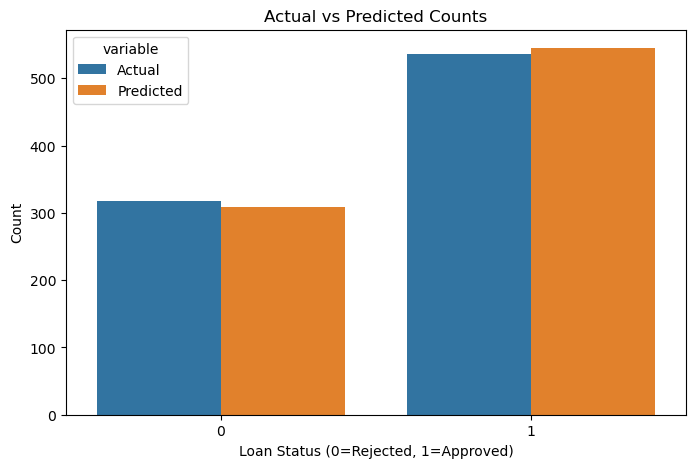

<Figure size 640x480 with 0 Axes>

In [25]:

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

plt.figure(figsize=(8,5))
sns.countplot(x='value', hue='variable', 
              data=pd.melt(results_df))
plt.title('Actual vs Predicted Counts')
plt.xlabel('Loan Status (0=Rejected, 1=Approved)')
plt.ylabel('Count')
plt.show()
plt.savefig("plot.png")

#### Save trained model

In [24]:
joblib.dump(model,'loan_approval_model.pkl')


['loan_approval_model.pkl']